## Face extraction

This notebook displays a process to face extraction.

Because that there are many faces in the LFW dataset containing only one photo, I need to choose those classes that over n images.

`n` is a parameter, I temporarily choose **5**.

## Import libraries

In [1]:
import os

import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm
from numpy import asarray
from mtcnn.mtcnn import MTCNN

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline         

## Function: **extract_face**

Function (**extract_face**) will perform following processes:
1. Read image containing face from LFW dataset using matplotlib package.

2. MTCNN detector extracts face from image, and return the location of face in **(x1, y1, width, height)** format.

3. Extract the face based on (x1, y1, width, height).

4. (Optional) Resize the image on (224, 224).

5. Decide return the image in numpy array or save image.

In [2]:
# create the detector, using default weights
detector = MTCNN()

# extract a single face from a given photograph
def extract_face(filename:str, 
                 required_size:tuple=(224, 224),
                 mode:str='save',
                 fname:str='face_img.jpg',
                 detector=detector):
    """
    Extract a single face from a given photograph.

    Args:
        filename: String file path for image extraction.
        required_size: Image size for resizing.
        mode: 'save' for image saving; 'return' for return extract face array.
        fname: image save path if mode is 'save'
        detector: Detector for face extraction.
    """
    # load image from file
    pixels = plt.imread(filename)
 
    # detect faces in the image
    results = detector.detect_faces(pixels)
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = pixels[y1:y2, x1:x2]
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)

    # save or return image
    if mode == 'save':
        image.save(fname)
    elif mode == 'return':
        face_array = asarray(image)
        return face_array
    else:
        raise ValueError(" String of mode is illegal. Enter 'save' or 'return' please ! ")

### Function test

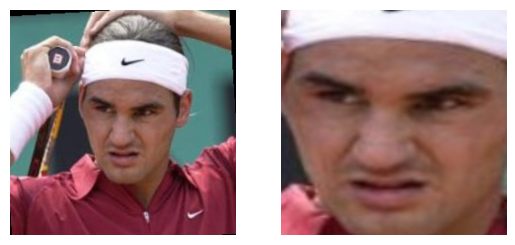

In [3]:
# choose a file path
filepath = 'lfw_dataset/lfw_home/lfw_funneled/Roger_Federer/Roger_Federer_0012.jpg'

# set figure
plt.figure()

# original image
plt.subplot(1, 2, 1)
img = plt.imread(filepath)
plt.imshow(img)
plt.axis("off")

# face image after extraction
plt.subplot(1, 2, 2)
img_extract = extract_face(filepath, mode='return')
plt.imshow(img_extract)
plt.axis("off")

plt.show()

## Function: **record_training_cls**

This function will walk all the classes of datasets given path, and extract the face from searched images. However, you can control the number of images that threshold to be extracted in a class (name folder).

For example, in LFW dataset (path: **lfw_dataset/lfw_home/lfw_funneled**)

```python
lfw_dataset
    |___lfw_home
        |___lfw_funneled
            |___Name1: 1 image
            |___Name2: 5 images
            |___Name3: 4 images
            ...
```

If I set the threshold as 5, the function only extracts the images on folder containing more than 5 images (Name2, ...).

Of course, the value of threshold is flexible by yourself.

In [4]:
# Extract faces that number of images overs five, and record the path for further experiments
def record_training_cls(datasets_path, threshold=5):
    """
    Extract faces from dataset and save the face image to 'datasets' folder.
    Save classes information in 'cls_train.txt' on current directory for further experiments.
    You can control the threshold for face extraction at least n image(s) in a class folder.

    Args:
    datasets_path: The path of LFW dataset.
    threshold: The metrics for face extraction based on image number in a class.
    """
    # create datasets directory
    if not os.path.isdir('datasets'):
        os.mkdir('datasets')

    # class names for original datasets
    types_name = os.listdir(datasets_path)
    types_name = sorted(types_name)

    # class names for extracted faces
    cls_id = 0 
    with open('cls_train.txt', 'w') as list_file:
        for type_name in tqdm(types_name):
            if 'pairs' not in type_name:
                photos_path = os.path.join(datasets_path, type_name)
                if not os.path.isdir(photos_path): # check dir exists
                    continue
                photos_name = os.listdir(photos_path)
                
                # extract faces
                if len(photos_name) >= threshold:
                    data_dir = os.path.join('datasets', type_name)
                    if not os.path.isdir(data_dir): # check dir exists
                        os.mkdir(data_dir)
                    
                    for photo_name in photos_name:
                        img_path = os.path.join(os.path.abspath(datasets_path), type_name, photo_name)
                        face_save_path = os.path.join('datasets', type_name, photo_name)
                        extract_face(img_path, mode='save', fname=face_save_path)
                        list_file.write(str(cls_id) + ";" + '%s'%(face_save_path))
                        list_file.write('\n')
                    cls_id += 1
    print("class information of training dataset is stored as cls_train.txt")

datasets_path = "lfw_dataset/lfw_home/lfw_funneled"
record_training_cls(datasets_path=datasets_path, threshold=30)

100%|██████████████████████████████████████████████████████████████████████████████| 5760/5760 [26:00<00:00,  3.69it/s]

class information of training dataset is stored as cls_train.txt
